## Setup

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from totalsegmentator.map_to_binary import class_map, class_map_5_parts
from vis import plot_diff, aggregate, plot_hist_by_entity, get_means
import seaborn as sns

/tmp/ipykernel_3086978/2063269935.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# reference from TS repo
with open("data/total_v2.json", 'r') as f:
    ref_dict = json.load(f)

ref_dict['nsd'] = ref_dict.pop('normalized_surface_distance')

with open("data/total_v1.json", 'r') as f:
    ref_dict1 = json.load(f)

In [4]:
!ls /data/core-rad/data/tucker_results/results_grid_prune/

00.csv	     01_fast.csv  03.csv       04_fast.csv  06.csv	 07_fast.csv
00_fast.csv  02.csv	  03_fast.csv  05.csv	    06_fast.csv  08.csv
01.csv	     02_fast.csv  04.csv       05_fast.csv  07.csv	 08_fast.csv


## Establish baseline for experiments on TS dataset

In [17]:
df = pd.read_csv("/data/core-rad/data/tucker/out/inference_lowres.csv")
means = aggregate(df)
pred_dict_lowres = {"dice": means["ds"].to_dict(), "nsd": means["nsd"].to_dict()}

In [10]:
df = pd.read_csv("/data/core-rad/data/tucker/out/inference_highres.csv")
means = aggregate(df)
pred_dict_highres = {"dice": means["ds"].to_dict(), "nsd": means["nsd"].to_dict()}

In [19]:
df = pd.read_csv("/data/core-rad/data/tucker/out/inference_lowres_new.csv")
means = aggregate(df)
pred_dict_lowres2 = {"dice": means["ds"].to_dict(), "nsd": means["nsd"].to_dict()}

In [5]:
df = pd.read_csv("/data/core-rad/data/tucker_results/results_grid_zero/00_fast.csv")
means = aggregate(df)
pred_dict_lowres_remap = {"dice": means["ds"].to_dict(), "nsd": means["nsd"].to_dict()}

In [6]:
df = pd.read_csv("/data/core-rad/data/tucker_results/results_grid_zero/00.csv")
means = aggregate(df)
pred_dict_highres = {"dice": means["ds"].to_dict(), "nsd": means["nsd"].to_dict()}

### 3mm model

In [32]:
#plot_diff(ref_dict, pred_dict_lowres2, title="Difference between V2 puplished values and 3mmv204 prediction on V2.0.1 Dataset")

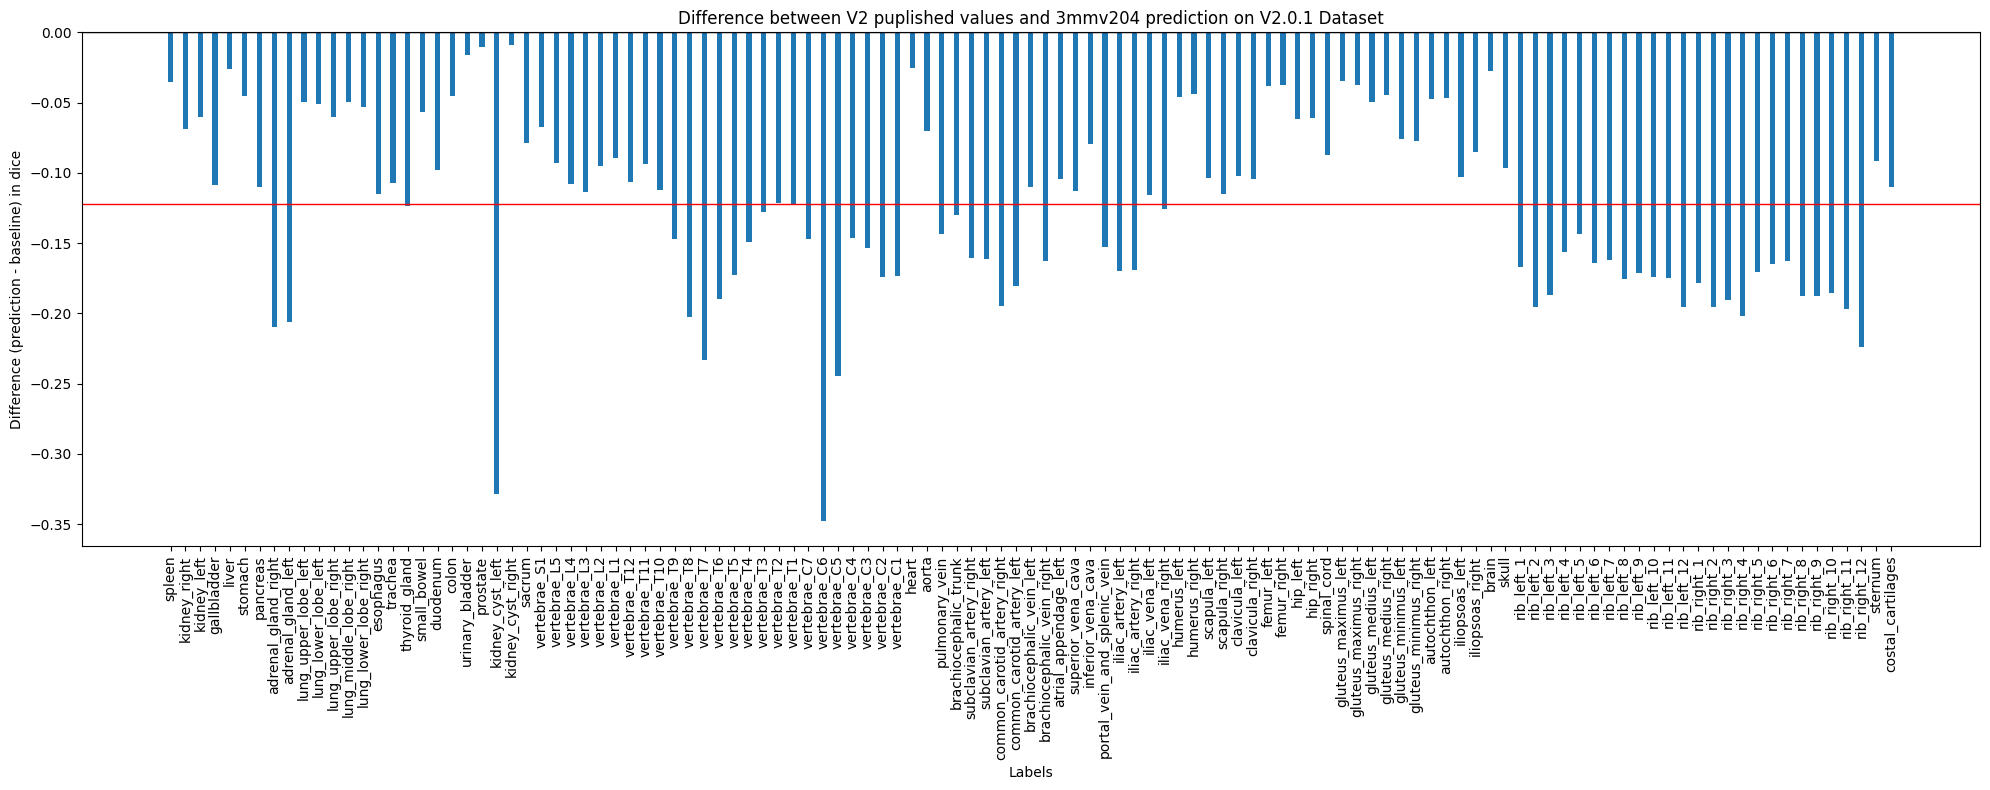

In [4]:
plot_diff(ref_dict, pred_dict_lowres_remap, title="Difference between V2 puplished values and 3mmv204 prediction on V2.0.1 Dataset", save="3mm_new.png")

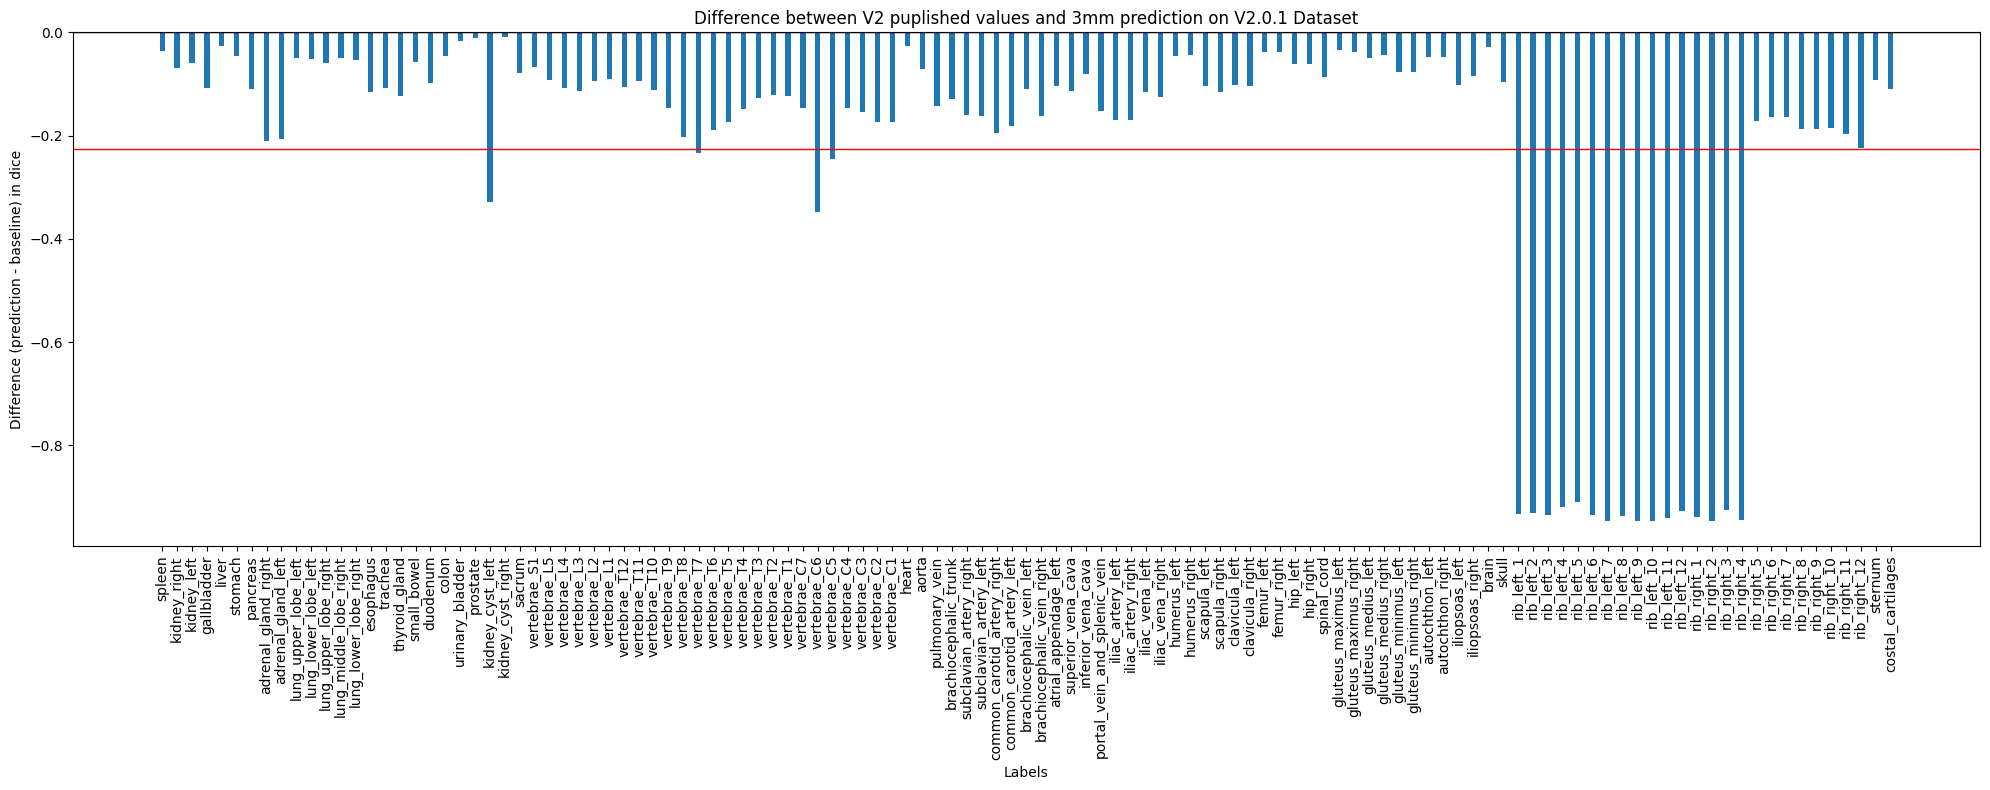

In [8]:
plot_diff(ref_dict, pred_dict_lowres, title="Difference between V2 puplished values and 3mm prediction on V2.0.1 Dataset", save="3mm_old.png")

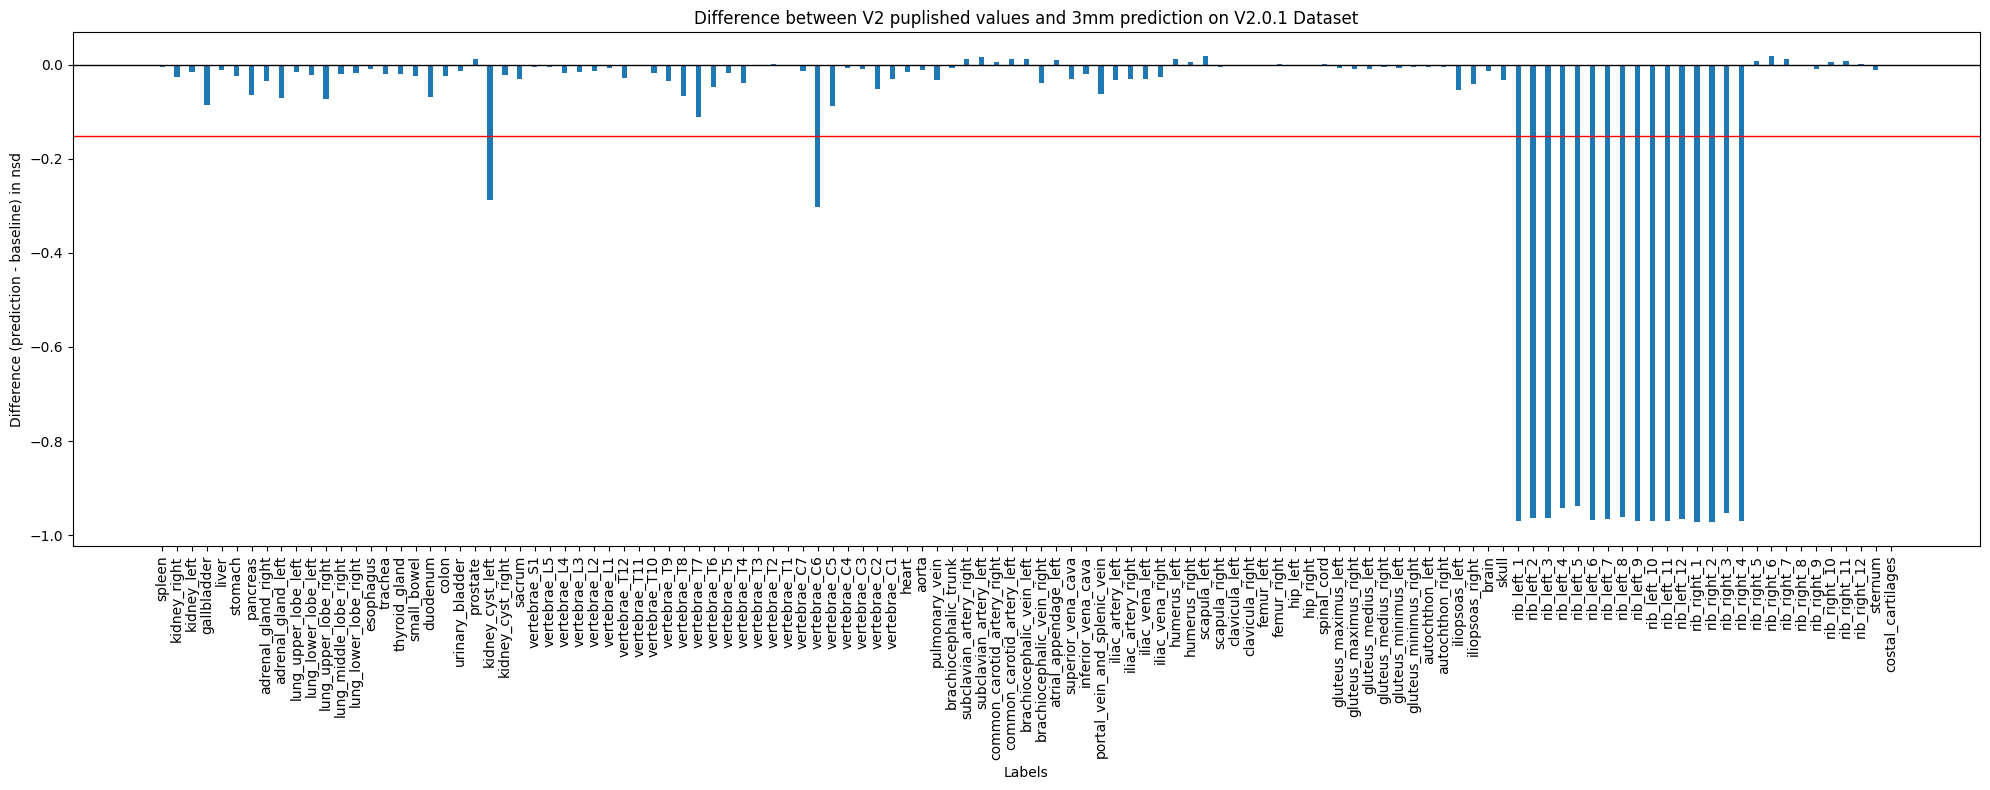

In [34]:
plot_diff(ref_dict, pred_dict_lowres, entity="nsd", title="Difference between V2 puplished values and 3mm prediction on V2.0.1 Dataset")

### 1.5mm model

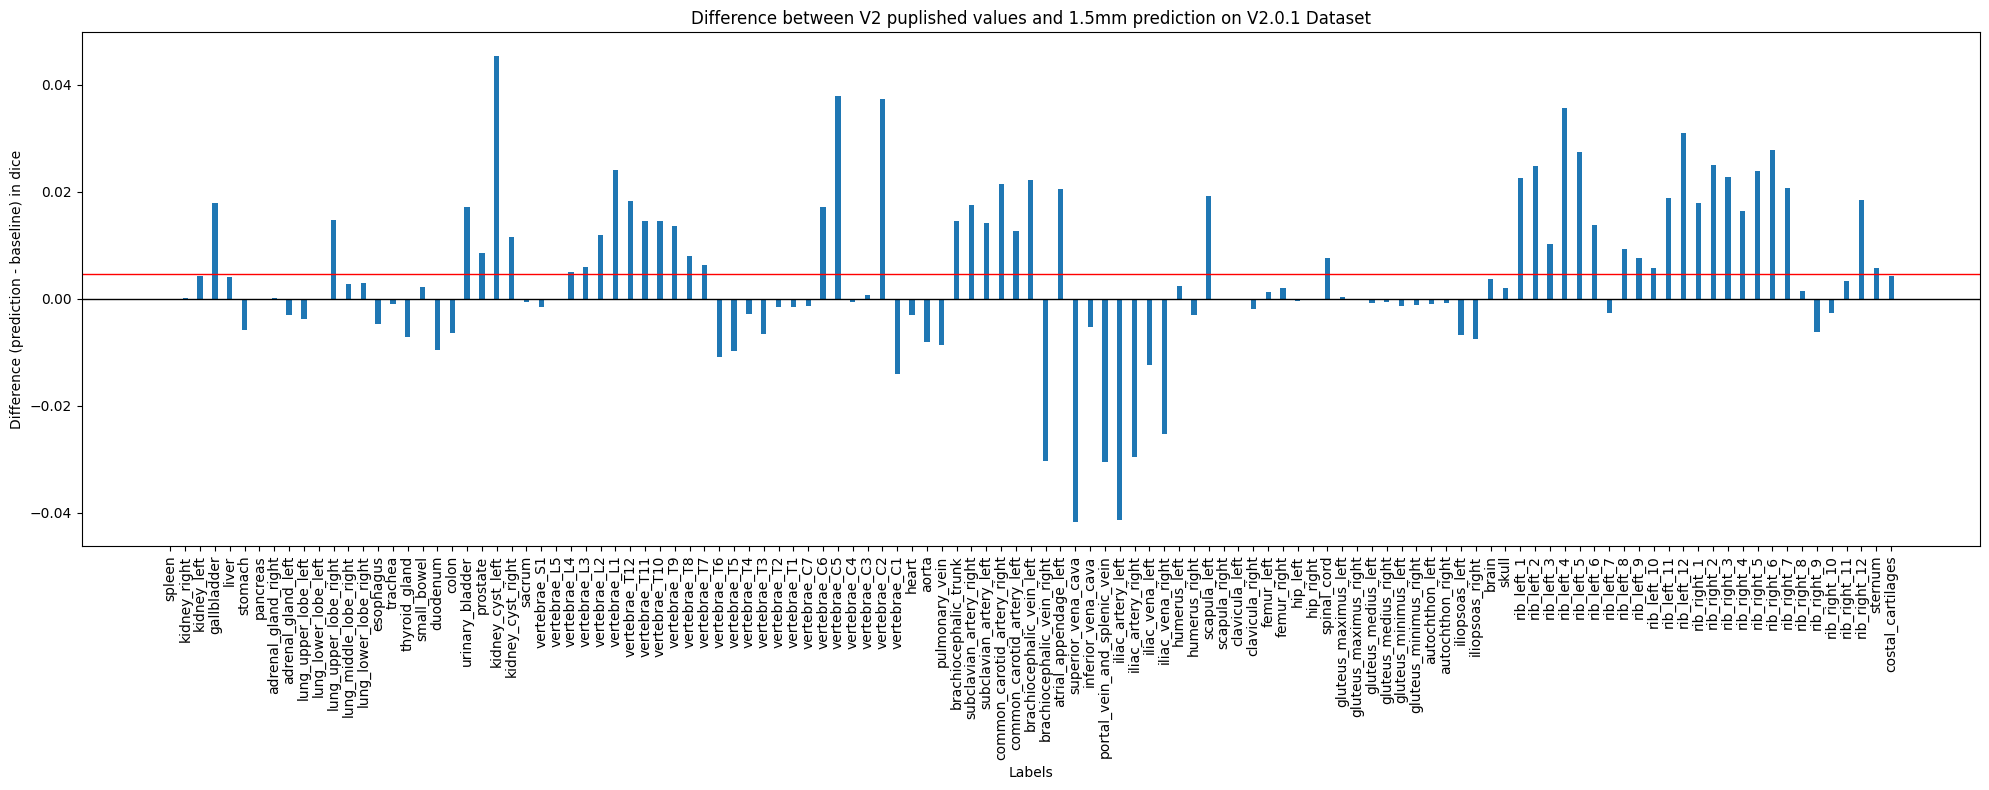

In [9]:
plot_diff(ref_dict, pred_dict_highres, title="Difference between V2 puplished values and 1.5mm prediction on V2.0.1 Dataset",save="15mm.png")

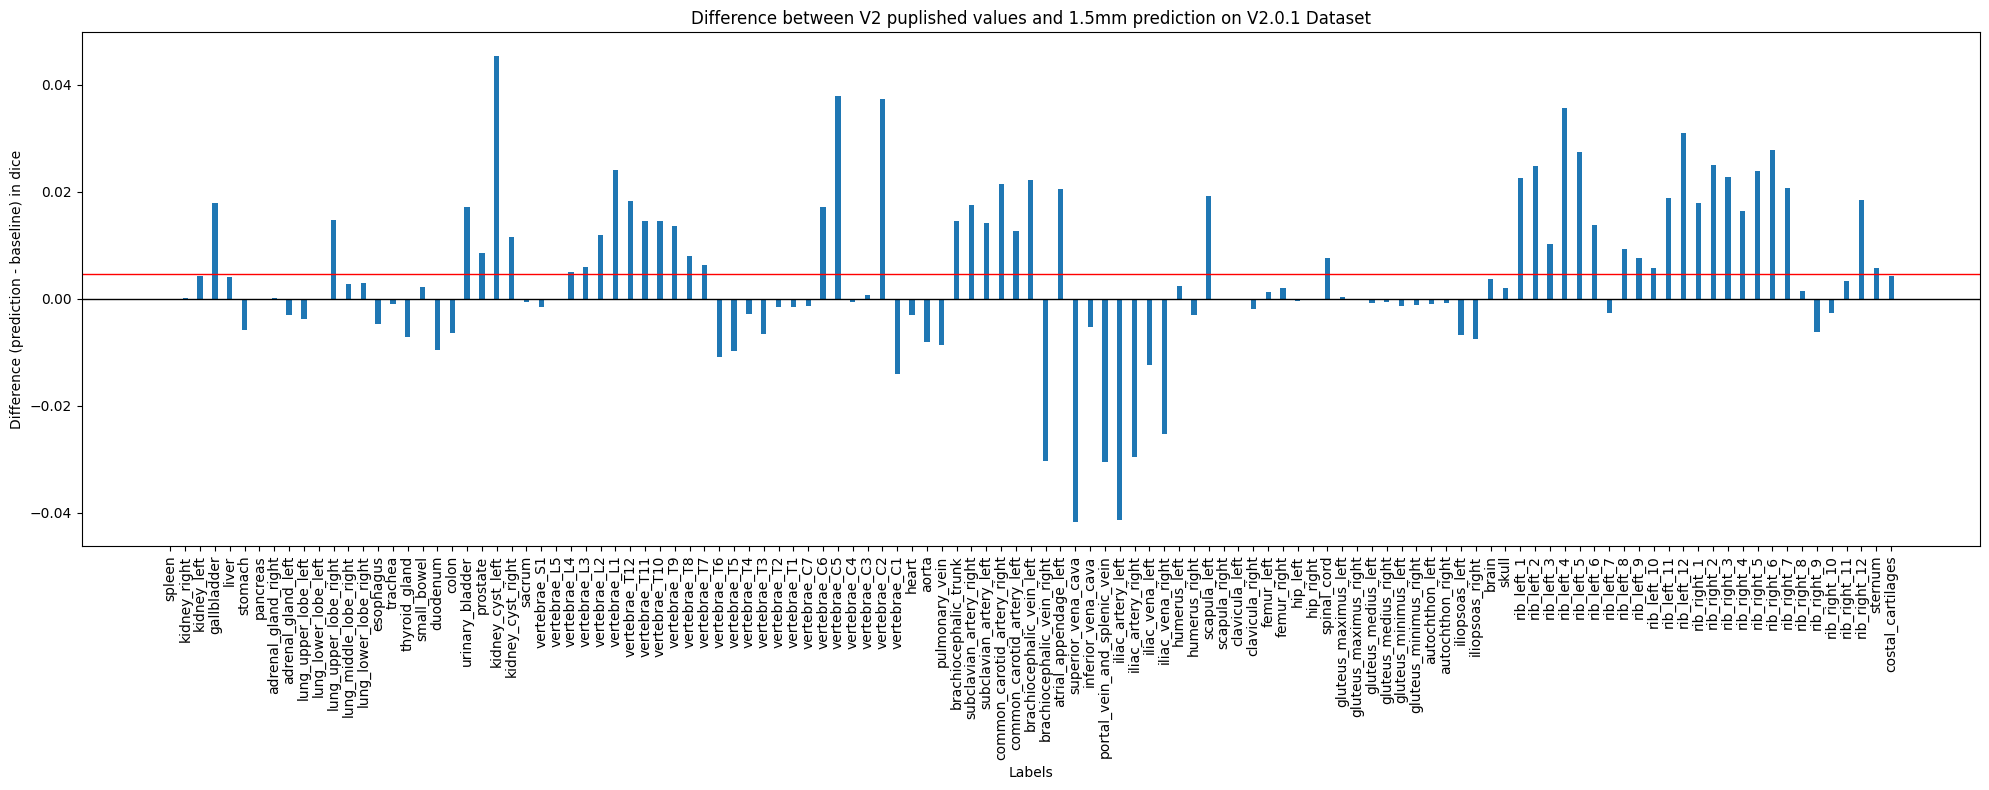

In [11]:
plot_diff(ref_dict, pred_dict_highres, title="Difference between V2 puplished values and 1.5mm prediction on V2.0.1 Dataset",save="15mm.png")

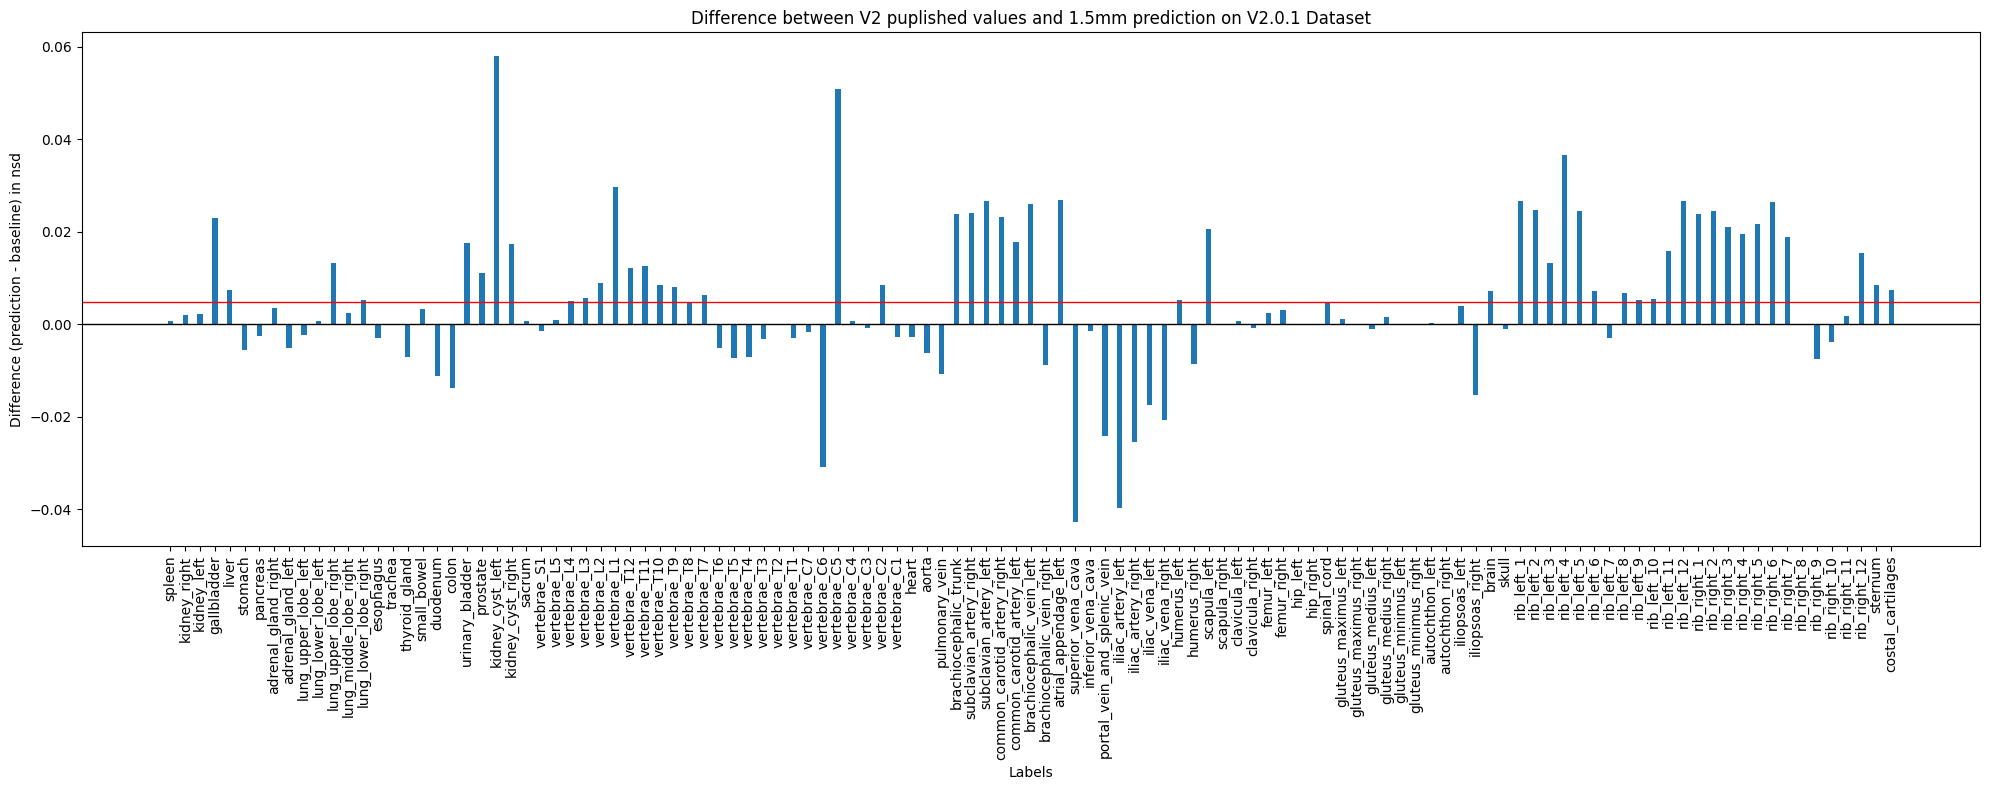

In [36]:
plot_diff(ref_dict, pred_dict_highres, entity="nsd", title="Difference between V2 puplished values and 1.5mm prediction on V2.0.1 Dataset")

## Results compression

In [6]:
file_path = '/data/core-rad/data/tucker_results/results_grid/0{}_fast.csv'
means, stds = get_means(pred_dict_lowres, "dice", file_path)

Text(0, 0.5, 'mean dice')

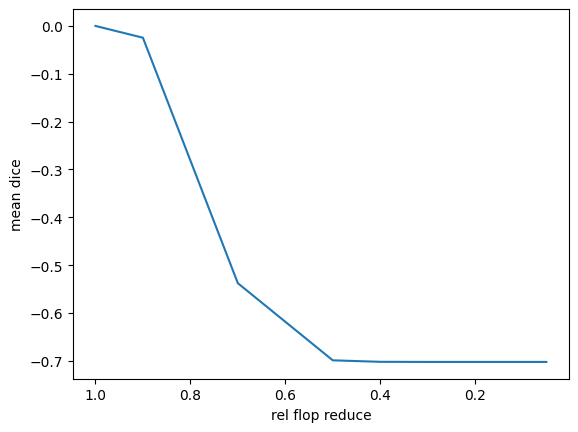

In [7]:
x = [1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]
plt.plot(x, means)
# Invert the x-axis
plt.gca().invert_xaxis()

# Set the x-axis ticks and labels to start from 1 and end with 0
#plt.xticks(reversed(x), [str(i) for i in reversed(x)])
plt.xlabel('rel flop reduce')
plt.ylabel('mean dice')

In [13]:
ALL = []
entity = "dice"
file_path = '/data/core-rad/data/tucker_results/results_grid/0{}.csv'

# Process original data
all_means2, _ = get_means(pred_dict_highres, entity, file_path)
ALL.append(all_means2)

# Process data for each map
class_maps = [
    "class_map_part_organs",
    "class_map_part_vertebrae",
    "class_map_part_cardiac", 
    "class_map_part_muscles",
    "class_map_part_ribs"
]

for class_map in class_maps:
    all_means2, _ = get_means(pred_dict_highres, entity, file_path, class_map=class_map)
    ALL.append(all_means2)

Text(0, 0.5, 'mean dice')

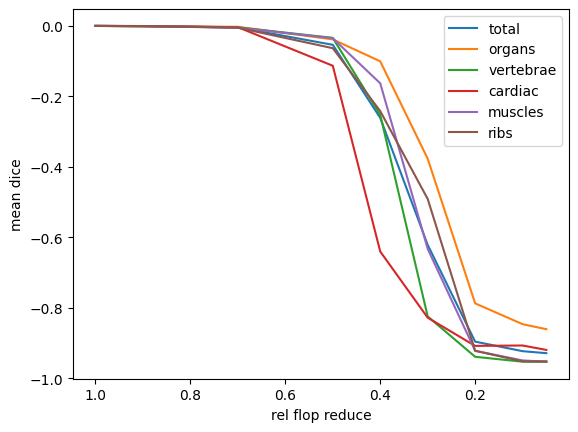

In [14]:
x = [1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]
for i, map in enumerate(["total", "organs", "vertebrae", "cardiac", "muscles", "ribs"]):
    plt.plot(x, ALL[i], label=map)
# Invert the x-axis
plt.gca().invert_xaxis()
plt.legend()
# Set the x-axis ticks and labels to start from 1 and end with 0
#plt.xticks(reversed(x), [str(i) for i in reversed(x)])
plt.xlabel('rel flop reduce')
plt.ylabel('mean dice')

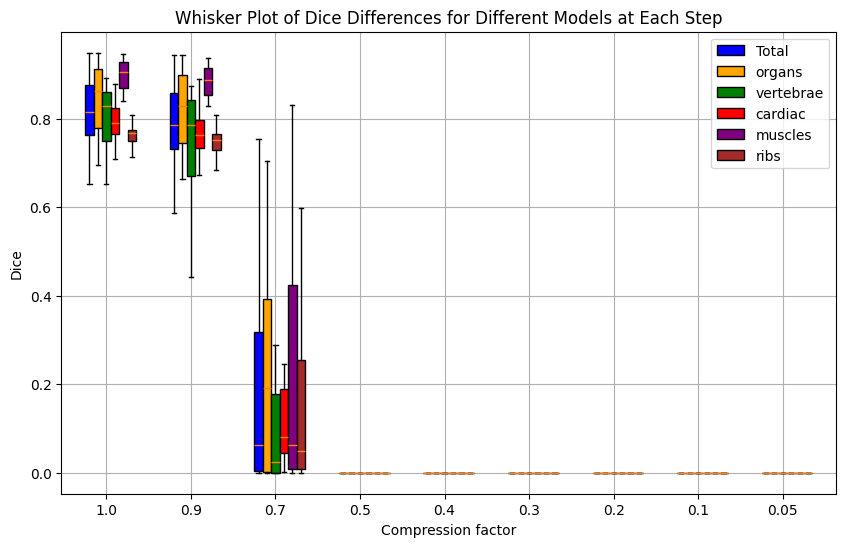

In [6]:
entity = "dice"
file_path_template = '/data/core-rad/data/tucker_results/results_grid_zero/0{}_fast.csv'
plot_hist_by_entity(pred_dict_lowres_remap, entity, file_path_template, diff=False)

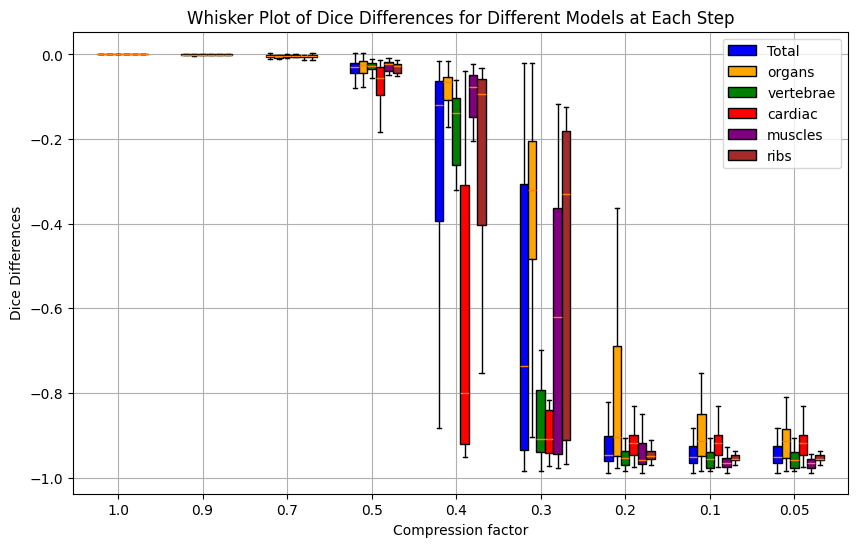

In [8]:
entity = "dice"
file_path_template = '/data/core-rad/data/tucker_results/results_grid_zero/0{}.csv'
plot_hist_by_entity(pred_dict_highres, entity, file_path_template, save="15mm_compression.png")

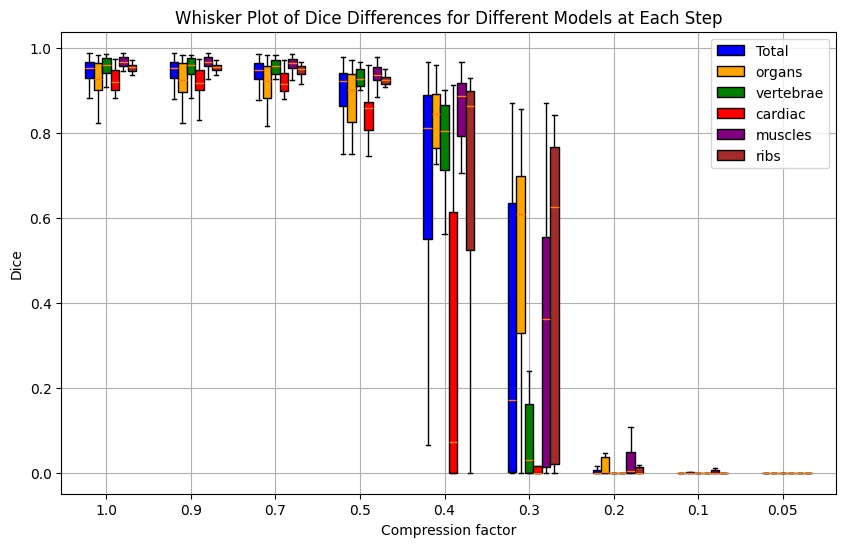

In [15]:
entity = "dice"
file_path_template = '/data/core-rad/data/tucker_results/results_grid_zero/0{}.csv'
plot_hist_by_entity(pred_dict_highres, entity, file_path_template, diff=False)#save="15mm_compression.png")

## Finetune

### 1.5model

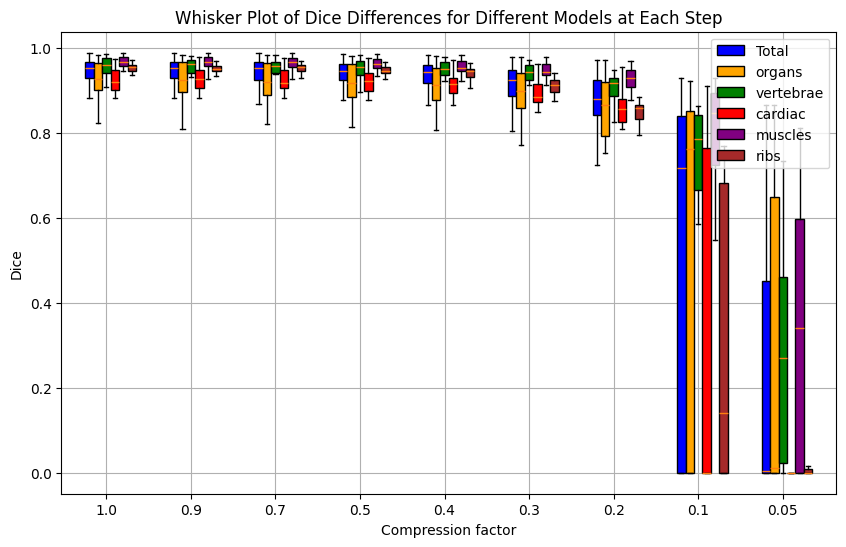

In [14]:
#sns.set_theme()
entity = "dice"
file_path_template = '/data/core-rad/data/tucker_results/results_grid_fine/0{}.csv'
plot_hist_by_entity(pred_dict_highres, entity, file_path_template,  diff=False)#save="15mm_compression_fine2.png")

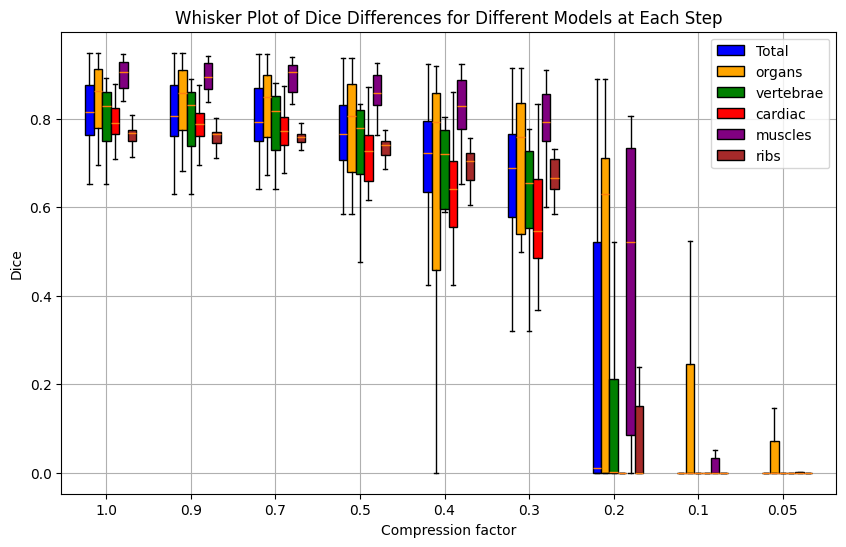

In [7]:
entity = "dice"
file_path_template = '/data/core-rad/data/tucker_results/results_grid_fine/0{}_fast.csv'
plot_hist_by_entity(pred_dict_lowres_remap, entity, file_path_template, diff=False)

In [16]:
file_path = '/data/core-rad/data/tucker_results/results_grid_zero/0{}.csv'
means_pre, stds = get_means(pred_dict_highres, "dice", file_path)

file_path = '/data/core-rad/data/tucker_results/results_grid_fine/0{}.csv'
means_fine, stds = get_means(pred_dict_highres, "dice", file_path)

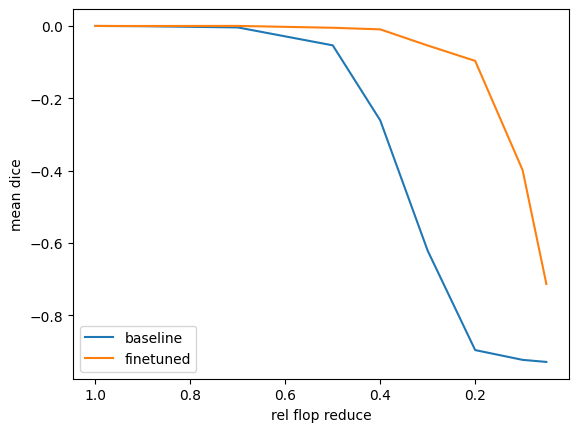

In [17]:
x = [1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]
plt.plot(x, means_pre, label="baseline")
plt.plot(x, means_fine, label="finetuned")
# Invert the x-axis
plt.gca().invert_xaxis()
plt.legend()
# Set the x-axis ticks and labels to start from 1 and end with 0
#plt.xticks(reversed(x), [str(i) for i in reversed(x)])
plt.xlabel('rel flop reduce')
plt.ylabel('mean dice')
plt.savefig("diff15.png")

In [20]:
file_path = '/data/core-rad/data/tucker_results/results_grid_zero/0{}_fast.csv'
means_pre, stds = get_means(pred_dict_lowres_remap, "dice", file_path)

file_path = '/data/core-rad/data/tucker_results/results_grid_fine/0{}_fast.csv'
means_fine, stds = get_means(pred_dict_lowres_remap, "dice", file_path)

Text(0, 0.5, 'mean dice')

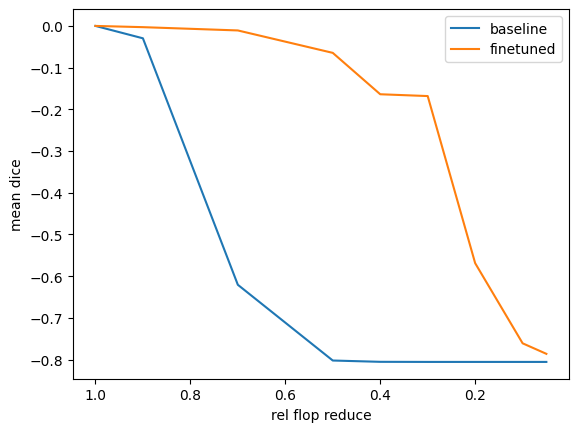

In [21]:
x = [1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]
plt.plot(x, means_pre, label="baseline")
plt.plot(x, means_fine, label="finetuned")
# Invert the x-axis
plt.gca().invert_xaxis()
plt.legend()
# Set the x-axis ticks and labels to start from 1 and end with 0
#plt.xticks(reversed(x), [str(i) for i in reversed(x)])
plt.xlabel('rel flop reduce')
plt.ylabel('mean dice')

## Results prune

### 1.5mm

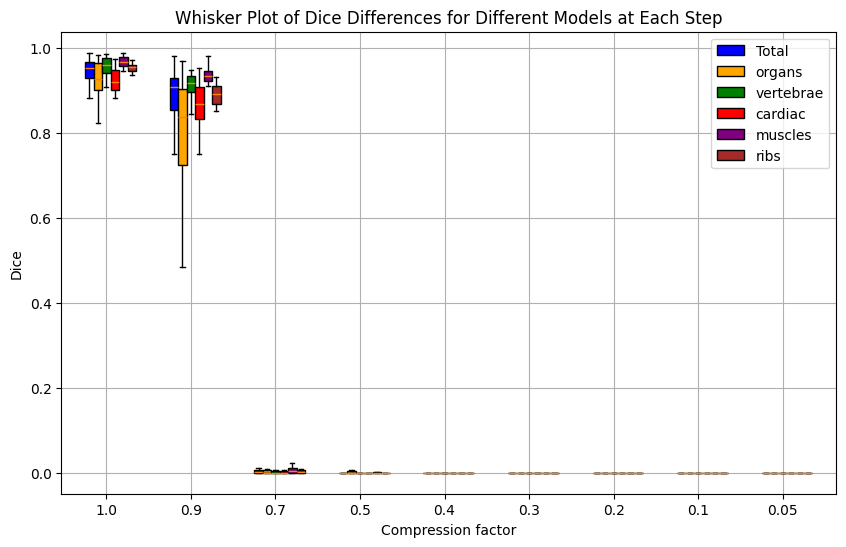

In [7]:
#sns.set_theme()
entity = "dice"
file_path_template = '/data/core-rad/data/tucker_results/results_grid_prune/0{}.csv'
plot_hist_by_entity(pred_dict_highres, entity, file_path_template,  diff=False)#save="15mm_compression_fine2.png")

### 3mm

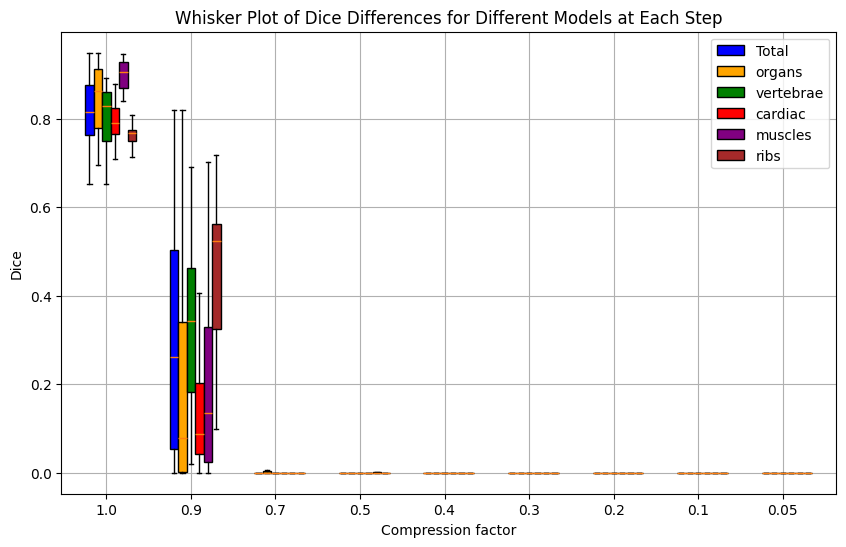

In [8]:
entity = "dice"
file_path_template = '/data/core-rad/data/tucker_results/results_grid_prune/0{}_fast.csv'
plot_hist_by_entity(pred_dict_lowres_remap, entity, file_path_template, diff=False)

In [ ]:
ALL = []
entity = "dice"
file_path = '/data/core-rad/data/tucker_results/results_grid/0{}.csv'

# Process original data
all_means2, _ = get_means(pred_dict_highres, entity, file_path)
ALL.append(all_means2)

# Process data for each map
class_maps = [
    "class_map_part_organs",
    "class_map_part_vertebrae",
    "class_map_part_cardiac", 
    "class_map_part_muscles",
    "class_map_part_ribs"
]

for class_map in class_maps:
    all_means2, _ = get_means(pred_dict_highres, entity, file_path, class_map=class_map)
    ALL.append(all_means2)

x = [1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]
for i, map in enumerate(["total", "organs", "vertebrae", "cardiac", "muscles", "ribs"]):
    plt.plot(x, ALL[i], label=map)
# Invert the x-axis
plt.gca().invert_xaxis()
plt.legend()
# Set the x-axis ticks and labels to start from 1 and end with 0
#plt.xticks(reversed(x), [str(i) for i in reversed(x)])
plt.xlabel('rel flop reduce')
plt.ylabel('mean dice')

Text(0, 0.5, 'mean dice')

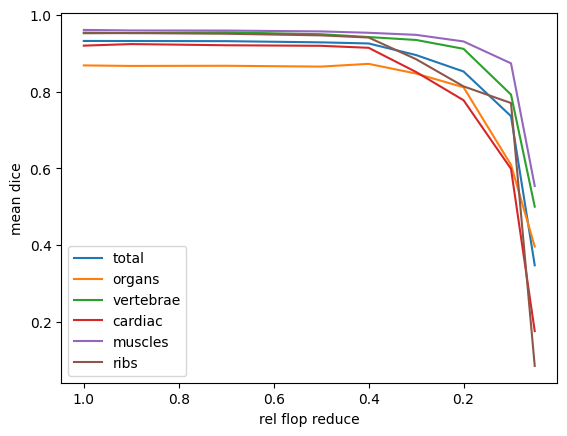

In [20]:
from copy import copy
import pandas as pd
import numpy as np

ALL = []
entity = "dice"

def aggregate(df):
    filtered_df = df[(df['ds'] != -1) & (df['nsd'] != -1)]
    means = filtered_df.groupby('label_str')[['ds', 'nsd']].mean()
    return means


def process_data(df, pred_dict_1, entity, class_map=None):
    all_means = []
    all_means2 = []
    all_stds = []
    std_diff = []
    
    for i in range(9):
        ref = copy(pred_dict_1)
        
        # Read CSV file
        df = pd.read_csv(f'/data/core-rad/data/tucker_results/results_grid_fine/0{i}.csv')
        means = aggregate(df)
        pred_dict_n = {"dice": means["ds"].to_dict(), "nsd": means["nsd"].to_dict()}
        
        ref, pred_dict_n = ref[entity], pred_dict_n[entity]
        
        # Determine labels based on the given class map
        if class_map:
            all_labels = list(class_map_5_parts[class_map].values())
        else:
            all_labels = list(ref.keys())
        
        v1_values = [pred_dict_n[k] for k in all_labels]
        v2_values = [ref[k] for k in all_labels]
        
        # Calculate differences
        differences = [v1 - v2 for v1, v2 in zip(v1_values, v2_values)]
        all_means.append(np.mean(differences))
        all_means2.append(np.mean(v1_values))
        std_diff.append(np.std(differences))
        
        #print(i, all_means2[-1], all_means[-1])
        
    return all_means2

# Process original data
all_means2 = process_data(df, pred_dict_1, entity)
ALL.append(all_means2)

# Process data for each map
class_maps = [
    "class_map_part_organs",
    "class_map_part_vertebrae",
    "class_map_part_cardiac", 
    "class_map_part_muscles",
    "class_map_part_ribs"
]

for class_map in class_maps:
    all_means2 = process_data(df, pred_dict_1, entity, class_map=class_map)
    ALL.append(all_means2)

x = [1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05]
for i, map in enumerate(["total", "organs", "vertebrae", "cardiac", "muscles", "ribs"]):
    plt.plot(x, ALL[i], label=map)
# Invert the x-axis
plt.gca().invert_xaxis()
plt.legend()
# Set the x-axis ticks and labels to start from 1 and end with 0
#plt.xticks(reversed(x), [str(i) for i in reversed(x)])
plt.xlabel('rel flop reduce')
plt.ylabel('mean dice')

In [16]:
!ls /data2

core-rad


In [26]:
import os
from sklearn.model_selection import GroupKFold
base = "/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/imagesTr"
root = "/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/labelsTr"
patients = os.listdir(root)
k = 5

def get_patient(path_list):
    return [path.split('_')[1] for path in path_list]

patient_ids = get_patient(patients)

gkf = GroupKFold(n_splits=k)
splits = []

for i, (train_idx, test_idx) in enumerate(gkf.split(patients, groups=patient_ids)):
    splits.append(
            {
                'train': [os.path.join(base, patients[idx]) for idx in train_idx],
                'val': [os.path.join(base, patients[idx]) for idx in test_idx],
            }
        )

In [66]:
import os
import json
from sklearn.model_selection import GroupKFold

root = "/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/labelsTr"
k = 5
seed = 42
rng = np.random.default_rng(seed)

patients = os.listdir(root)
rng.shuffle(patients)

def get_patient(path_list):
    return [path.split('_')[1] for path in path_list]

patient_ids = get_patient(patients)

gkf = GroupKFold(n_splits=k)
splits = []

for i, (train_idx, test_idx) in enumerate(gkf.split(patients, groups=patient_ids)):
    splits.append(
            {
                'train': [patients[idx].split(".nii.gz")[0] for idx in train_idx],
                'val': [patients[idx].split(".nii.gz")[0] for idx in test_idx],
            }
        )
# Save the splits to a JSON file
with open("/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/splits_final.json", 'w') as json_file:
    json.dump(splits, json_file, sort_keys=False, indent=4)

In [65]:
splits

[{'train': ['psma_838c9340e85ca431_2016-04-20',
   'fdg_e4e99dbb47_07-17-2005-NA-PET-CT Ganzkoerper  primaer mit KM-52196',
   'fdg_3c94a00f90_05-11-2007-NA-PET-CT Ganzkoerper  primaer mit KM-83405',
   'fdg_8f2878df50_02-21-2003-NA-PET-CT Ganzkoerper  primaer mit KM-89268',
   'fdg_44b95650c3_10-02-2003-NA-PET-CT Ganzkoerper  primaer mit KM-37785',
   'psma_7731a871ce8b4642_2015-06-11',
   'fdg_62b114e09b_06-09-2003-NA-PET-CT Ganzkoerper  primaer mit KM-80184',
   'psma_4da96443cf212c5f_2020-09-25',
   'fdg_61d5bc58fc_12-15-2005-NA-PET-CT Ganzkoerper  primaer mit KM-78550',
   'fdg_e1a4145b63_03-05-2006-NA-PET-CT Ganzkoerper  primaer mit KM-08969',
   'psma_53d59c767e28c8b9_2017-07-06',
   'fdg_f21755a99b_05-05-2005-NA-PET-CT Ganzkoerper  primaer mit KM-44651',
   'fdg_b4e5c1047c_10-10-2004-NA-PET-CT Ganzkoerper  primaer mit KM-42556',
   'fdg_5e8b013935_12-16-2001-NA-PET-CT Ganzkoerper  primaer mit KM-57206',
   'psma_2e5119d4ac37d41d_2016-08-30',
   'fdg_25707f94a2_07-03-2003-NA-PET

In [54]:
#['/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/imagesTr/fdg_bbb2df1e31_01-29-2005-NA-PET-CT Ganzkoerper  primaer mit KM-90674.nii.gz',
# '/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/imagesTr/psma_88c7a13c98fc9ede_2020-05-22.nii.gz',
# '/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/imagesTr/fdg_1f65acff65_05-06-2007-NA-PET-CT Ganzkoerper nativ u. mit KM-95034.nii.gz',
# '/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/imagesTr/psma_19eed20451e33bc1_2019-10-18.nii.gz',
splits[0]["val"]

['/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/imagesTr/psma_215789b9b4379af2_2018-05-09.nii.gz',
 '/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/imagesTr/fdg_7785c10e91_12-15-2006-NA-PET-CT Ganzkoerper  primaer mit KM-36884.nii.gz',
 '/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/imagesTr/fdg_302613f9a5_04-06-2007-NA-PET-CT Ganzkoerper nativ-59045.nii.gz',
 '/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/imagesTr/fdg_3d6f425a76_07-22-2002-NA-PET-CT Ganzkoerper  primaer mit KM-37622.nii.gz',
 '/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/imagesTr/fdg_978c395243_01-13-2005-NA-PET-CT Ganzkoerper  primaer mit KM-90116.nii.gz',
 '/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/imagesTr/psma_e3c5b97cc53ac899_2017-06-09.nii.gz',
 '/data2/core-rad/data/pet-ct/autopet/autopet3/train/release_nnunet/imagesTr/fdg_5d994c3f44_03-05-2006-NA-PET-CT Ganzkoerper  primaer mit KM-80237.n

In [35]:
all = []
for i in splits:
    all += i["val"]

In [37]:
a, b= np.unique(all, return_counts=True)
print(len(a), sum(b))

1614 1614


In [20]:
np.unique(ids, return_counts=True)

(array(['0011f3deaf', '01140d52d8', '0117d7f11f', ..., 'ff39795341',
        'ffa9445e55e2b071', 'ffcaa75377465b37'], dtype='<U16'),
 array([1, 1, 1, ..., 1, 2, 3]))

In [54]:
remap = {'rib_right_4': 'rib_left_1',
 'rib_right_3': 'rib_left_2',
 'rib_left_1': 'rib_left_3',
 'rib_left_2': 'rib_left_4',
 'rib_left_3': 'rib_left_5',
 'rib_left_4': 'rib_left_6',
 'rib_left_5': 'rib_left_7',
 'rib_left_6': 'rib_left_8',
 'rib_left_7': 'rib_left_9',
 'rib_left_8': 'rib_left_10',
 'rib_left_9': 'rib_left_11',
 'rib_left_10': 'rib_left_12',
 'rib_left_11': 'rib_right_1',
 'rib_left_12': 'rib_right_2',
 'rib_right_1': 'rib_right_3',
 'rib_right_2': 'rib_right_4',
 'rib_right_5': 'rib_right_5',
 'rib_right_6': 'rib_right_6',
 'rib_right_7': 'rib_right_7',
 'rib_right_8': 'rib_right_8',
 'rib_right_9': 'rib_right_9',
 'rib_right_10': 'rib_right_10',
 'rib_right_11': 'rib_right_11',
 'rib_right_12': 'rib_right_12'}

In [41]:
ref.keys()

dict_keys(['adrenal_gland_left', 'adrenal_gland_right', 'aorta', 'atrial_appendage_left', 'autochthon_left', 'autochthon_right', 'brachiocephalic_trunk', 'brachiocephalic_vein_left', 'brachiocephalic_vein_right', 'brain', 'clavicula_left', 'clavicula_right', 'colon', 'common_carotid_artery_left', 'common_carotid_artery_right', 'costal_cartilages', 'duodenum', 'esophagus', 'femur_left', 'femur_right', 'gallbladder', 'gluteus_maximus_left', 'gluteus_maximus_right', 'gluteus_medius_left', 'gluteus_medius_right', 'gluteus_minimus_left', 'gluteus_minimus_right', 'heart', 'hip_left', 'hip_right', 'humerus_left', 'humerus_right', 'iliac_artery_left', 'iliac_artery_right', 'iliac_vena_left', 'iliac_vena_right', 'iliopsoas_left', 'iliopsoas_right', 'inferior_vena_cava', 'kidney_cyst_left', 'kidney_cyst_right', 'kidney_left', 'kidney_right', 'liver', 'lung_lower_lobe_left', 'lung_lower_lobe_right', 'lung_middle_lobe_right', 'lung_upper_lobe_left', 'lung_upper_lobe_right', 'pancreas', 'portal_vei

In [1]:
kk = { 'spleen': 1, 'kidney_right': 2, 'kidney_left': 3, 'gallbladder': 4, 'liver': 5, 'stomach': 6, 'pancreas': 7, 'adrenal_gland_right': 8, 'adrenal_gland_left': 9, 'lung_upper_lobe_left': 10, 'lung_lower_lobe_left': 11, 'lung_upper_lobe_right': 12, 'lung_middle_lobe_right': 13, 'lung_lower_lobe_right': 14, 'esophagus': 15, 'trachea': 16, 'thyroid_gland': 17, 'small_bowel': 18, 'duodenum': 19, 'colon': 20, 'urinary_bladder': 21, 'prostate': 22, 'kidney_cyst_left': 23, 'kidney_cyst_right': 24, 'sacrum': 25, 'vertebrae_S1': 26, 'vertebrae_L5': 27, 'vertebrae_L4': 28, 'vertebrae_L3': 29, 'vertebrae_L2': 30, 'vertebrae_L1': 31, 'vertebrae_T12': 32, 'vertebrae_T11': 33, 'vertebrae_T10': 34, 'vertebrae_T9': 35, 'vertebrae_T8': 36, 'vertebrae_T7': 37, 'vertebrae_T6': 38, 'vertebrae_T5': 39, 'vertebrae_T4': 40, 'vertebrae_T3': 41, 'vertebrae_T2': 42, 'vertebrae_T1': 43, 'vertebrae_C7': 44, 'vertebrae_C6': 45, 'vertebrae_C5': 46, 'vertebrae_C4': 47, 'vertebrae_C3': 48, 'vertebrae_C2': 49, 'vertebrae_C1': 50, 'heart': 51, 'aorta': 52, 'pulmonary_vein': 53, 'brachiocephalic_trunk': 54, 'subclavian_artery_right': 55, 'subclavian_artery_left': 56, 'common_carotid_artery_right': 57, 'common_carotid_artery_left': 58, 'brachiocephalic_vein_left': 59, 'brachiocephalic_vein_right': 60, 'atrial_appendage_left': 61, 'superior_vena_cava': 62, 'inferior_vena_cava': 63, 'portal_vein_and_splenic_vein': 64, 'iliac_artery_left': 65, 'iliac_artery_right': 66, 'iliac_vena_left': 67, 'iliac_vena_right': 68, 'humerus_left': 69, 'humerus_right': 70, 'scapula_left': 71, 'scapula_right': 72, 'clavicula_left': 73, 'clavicula_right': 74, 'femur_left': 75, 'femur_right': 76, 'hip_left': 77, 'hip_right': 78, 'spinal_cord': 79, 'gluteus_maximus_left': 80, 'gluteus_maximus_right': 81, 'gluteus_medius_left': 82, 'gluteus_medius_right': 83, 'gluteus_minimus_left': 84, 'gluteus_minimus_right': 85, 'autochthon_left': 86, 'autochthon_right': 87, 'iliopsoas_left': 88, 'iliopsoas_right': 89, 'brain': 90, 'skull': 91, 'rib_left_1': 92, 'rib_left_2': 93, 'rib_left_3': 94, 'rib_left_4': 95, 'rib_left_5': 96, 'rib_left_6': 97, 'rib_left_7': 98, 'rib_left_8': 99, 'rib_left_9': 100, 'rib_left_10': 101, 'rib_left_11': 102, 'rib_left_12': 103, 'rib_right_1': 104, 'rib_right_2': 105, 'rib_right_3': 106, 'rib_right_4': 107, 'rib_right_5': 108, 'rib_right_6': 109, 'rib_right_7': 110, 'rib_right_8': 111, 'rib_right_9': 112, 'rib_right_10': 113, 'rib_right_11': 114, 'rib_right_12': 115, 'sternum': 116, 'costal_cartilages': 117}

In [3]:
kk2 = class_map["total"]

In [4]:
kk2

{1: 'spleen',
 2: 'kidney_right',
 3: 'kidney_left',
 4: 'gallbladder',
 5: 'liver',
 6: 'stomach',
 7: 'pancreas',
 8: 'adrenal_gland_right',
 9: 'adrenal_gland_left',
 10: 'lung_upper_lobe_left',
 11: 'lung_lower_lobe_left',
 12: 'lung_upper_lobe_right',
 13: 'lung_middle_lobe_right',
 14: 'lung_lower_lobe_right',
 15: 'esophagus',
 16: 'trachea',
 17: 'thyroid_gland',
 18: 'small_bowel',
 19: 'duodenum',
 20: 'colon',
 21: 'urinary_bladder',
 22: 'prostate',
 23: 'kidney_cyst_left',
 24: 'kidney_cyst_right',
 25: 'sacrum',
 26: 'vertebrae_S1',
 27: 'vertebrae_L5',
 28: 'vertebrae_L4',
 29: 'vertebrae_L3',
 30: 'vertebrae_L2',
 31: 'vertebrae_L1',
 32: 'vertebrae_T12',
 33: 'vertebrae_T11',
 34: 'vertebrae_T10',
 35: 'vertebrae_T9',
 36: 'vertebrae_T8',
 37: 'vertebrae_T7',
 38: 'vertebrae_T6',
 39: 'vertebrae_T5',
 40: 'vertebrae_T4',
 41: 'vertebrae_T3',
 42: 'vertebrae_T2',
 43: 'vertebrae_T1',
 44: 'vertebrae_C7',
 45: 'vertebrae_C6',
 46: 'vertebrae_C5',
 47: 'vertebrae_C4',
 48

In [8]:
kk3 =  {value: key for key, value in kk.items()}

In [13]:
for i in kk3:
    if kk3[i] == kk2[i]:
        print(True, kk3[i], kk2[i])
    else:
        print(False, kk3[i], kk2[i])

True spleen spleen
True kidney_right kidney_right
True kidney_left kidney_left
True gallbladder gallbladder
True liver liver
True stomach stomach
True pancreas pancreas
True adrenal_gland_right adrenal_gland_right
True adrenal_gland_left adrenal_gland_left
True lung_upper_lobe_left lung_upper_lobe_left
True lung_lower_lobe_left lung_lower_lobe_left
True lung_upper_lobe_right lung_upper_lobe_right
True lung_middle_lobe_right lung_middle_lobe_right
True lung_lower_lobe_right lung_lower_lobe_right
True esophagus esophagus
True trachea trachea
True thyroid_gland thyroid_gland
True small_bowel small_bowel
True duodenum duodenum
True colon colon
True urinary_bladder urinary_bladder
True prostate prostate
True kidney_cyst_left kidney_cyst_left
True kidney_cyst_right kidney_cyst_right
True sacrum sacrum
True vertebrae_S1 vertebrae_S1
True vertebrae_L5 vertebrae_L5
True vertebrae_L4 vertebrae_L4
True vertebrae_L3 vertebrae_L3
True vertebrae_L2 vertebrae_L2
True vertebrae_L1 vertebrae_L1
True ve

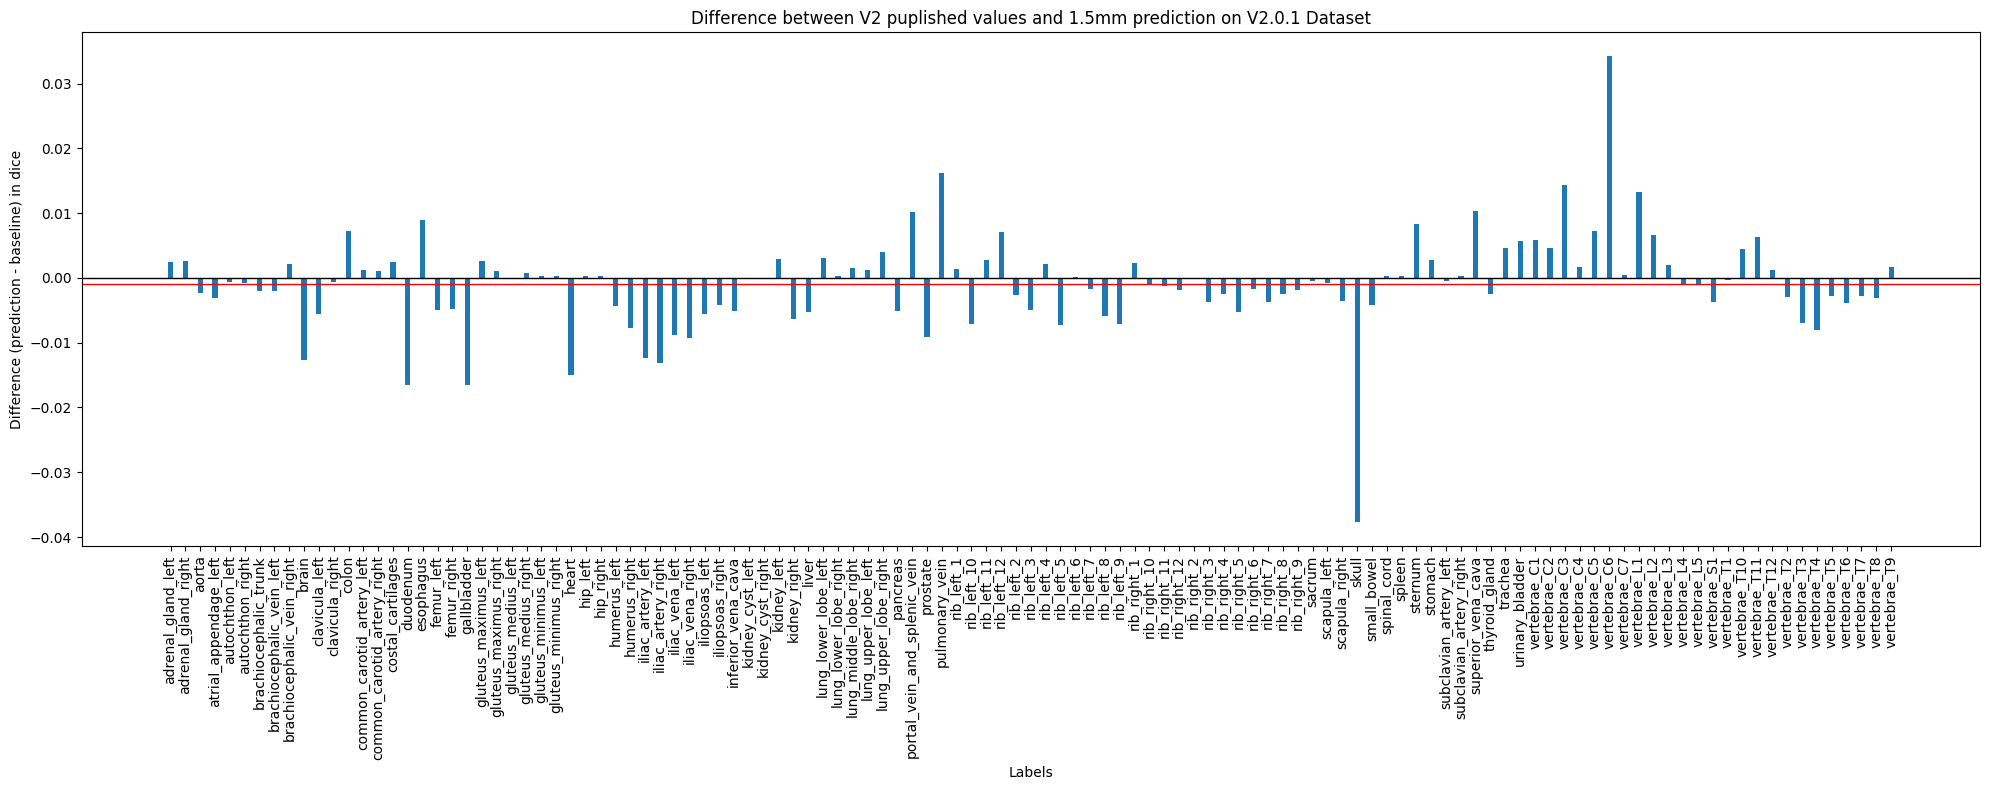

In [47]:
df = pd.read_csv("2024_Tucker_decomposition/results/zeroshot/00.csv")
means = aggregate(df)
pred_dict_n = {"dice": means["ds"].to_dict(), "nsd": means["ds"].to_dict()}
plot_diff(pred_dict_1, pred_dict_n, title="Difference between V2 puplished values and 1.5mm prediction on V2.0.1 Dataset")

In [27]:
total_v1_2 = {
    "dice": {
        "spleen": 0.983,
        'kidney_right': 0.939,
        'kidney_left': 0.953,
        "gallbladder": 0.875,
        "liver": 0.965,
        "stomach": 0.947,
        "aorta": 0.981,
        "inferior_vena_cava": 0.935,
        "portal_vein_and_splenic_vein": 0.881,
        "pancreas": 0.887,
        'adrenal_gland_right': 0.909,
        'adrenal_gland_left': 0.898,
        'lung_upper_lobe_left': 0.971,
        'lung_lower_lobe_left': 0.985,
        'lung_upper_lobe_right': 0.944,
        'lung_middle_lobe_right': 0.975,
        'lung_lower_lobe_right': 0.988,
        "vertebrae_L5": 0.961,
        "vertebrae_L4": 0.966,
        "vertebrae_L3": 0.959,
        "vertebrae_L2": 0.96,
        "vertebrae_L1": 0.948,
        "vertebrae_T12": 0.944,
        "vertebrae_T11": 0.953,
        "vertebrae_T10": 0.95,
        "vertebrae_T9": 0.959,
        "vertebrae_T8": 0.929,
        "vertebrae_T7": 0.935,
        "vertebrae_T6": 0.961,
        "vertebrae_T5": 0.965,
        "vertebrae_T4": 0.945,
        "vertebrae_T3": 0.958,
        "vertebrae_T2": 0.958,
        "vertebrae_T1": 0.984,
        "vertebrae_C7": 0.975,
        "vertebrae_C6": 0.871,
        "vertebrae_C5": 0.883,
        "vertebrae_C4": 0.89,
        "vertebrae_C3": 0.968,
        "vertebrae_C2": 0.984,
        "vertebrae_C1": 0.894,
        "esophagus": 0.944,
        "trachea": 0.977,
        "brain": 0.969,
        "iliac_artery_left": 0.928,
        "iliac_artery_right": 0.91,
        "iliac_vena_left": 0.929,
        "iliac_vena_right": 0.916,
        "small_bowel": 0.899,
        "duodenum": 0.837,
        "colon": 0.896,
        "rib_left_1": 0.97,
        "rib_left_2": 0.959,
        "rib_left_3": 0.96,
        "rib_left_4": 0.968,
        "rib_left_5": 0.925,
        "rib_left_6": 0.943,
        "rib_left_7": 0.939,
        "rib_left_8": 0.92,
        "rib_left_9": 0.932,
        "rib_left_10": 0.915,
        "rib_left_11": 0.926,
        "rib_left_12": 0.904,
        "rib_right_1": 0.969,
        "rib_right_2": 0.979,
        "rib_right_3": 0.969,
        "rib_right_4": 0.973,
        "rib_right_5": 0.928,
        "rib_right_6": 0.945,
        "rib_right_7": 0.95,
        "rib_right_8": 0.956,
        "rib_right_9": 0.96,
        "rib_right_10": 0.96,
        "rib_right_11": 0.955,
        "rib_right_12": 0.937,
        "humerus_left": 0.899,
        "humerus_right": 0.826,
        "scapula_left": 0.98,
        "scapula_right": 0.954,
        "clavicula_left": 0.96,
        "clavicula_right": 0.981,
        "femur_left": 0.914,
        "femur_right": 0.942,
        "hip_left": 0.968,
        "hip_right": 0.969,
        "sacrum": 0.963,
        "gluteus_maximus_left": 0.958,
        "gluteus_maximus_right": 0.961,
        "gluteus_medius_left": 0.958,
        "gluteus_medius_right": 0.959,
        "gluteus_minimus_left": 0.948,
        "gluteus_minimus_right": 0.952,
        "autochthon_left": 0.965,
        "autochthon_right": 0.964,
        "iliopsoas_left": 0.942,
        "iliopsoas_right": 0.947,
        "urinary_bladder": 0.934
    },
    "normalized_surface_distance": {
        "spleen": 0.985,
        'kidney_right': 0.956,
        'kidney_left': 0.962,
        "gallbladder": 0.958,
        "liver": 0.973,
        "stomach": 0.946,
        "aorta": 0.997,
        "inferior_vena_cava": 0.977,
        "portal_vein_and_splenic_vein": 0.953,
        "pancreas": 0.958,
        'adrenal_gland_right': 0.992,
        'adrenal_gland_left': 0.985,
        'lung_upper_lobe_left': 0.976,
        'lung_lower_lobe_left': 0.985,
        'lung_upper_lobe_right': 0.961,
        'lung_middle_lobe_right': 0.982,
        'lung_lower_lobe_right': 0.994,
        "vertebrae_L5": 0.971,
        "vertebrae_L4": 0.975,
        "vertebrae_L3": 0.973,
        "vertebrae_L2": 0.971,
        "vertebrae_L1": 0.971,
        "vertebrae_T12": 0.953,
        "vertebrae_T11": 0.966,
        "vertebrae_T10": 0.967,
        "vertebrae_T9": 0.969,
        "vertebrae_T8": 0.94,
        "vertebrae_T7": 0.957,
        "vertebrae_T6": 0.979,
        "vertebrae_T5": 0.991,
        "vertebrae_T4": 0.965,
        "vertebrae_T3": 0.974,
        "vertebrae_T2": 0.984,
        "vertebrae_T1": 0.998,
        "vertebrae_C7": 0.998,
        "vertebrae_C6": 0.938,
        "vertebrae_C5": 0.938,
        "vertebrae_C4": 0.921,
        "vertebrae_C3": 0.996,
        "vertebrae_C2": 1.0,
        "vertebrae_C1": 0.924,
        "esophagus": 0.974,
        "trachea": 0.992,
        "brain": 0.981,
        "iliac_artery_left": 0.962,
        "iliac_artery_right": 0.942,
        "iliac_vena_left": 0.964,
        "iliac_vena_right": 0.949,
        "small_bowel": 0.916,
        "duodenum": 0.906,
        "colon": 0.921,
        "rib_left_1": 0.997,
        "rib_left_2": 0.989,
        "rib_left_3": 0.983,
        "rib_left_4": 0.983,
        "rib_left_5": 0.94,
        "rib_left_6": 0.968,
        "rib_left_7": 0.955,
        "rib_left_8": 0.937,
        "rib_left_9": 0.948,
        "rib_left_10": 0.93,
        "rib_left_11": 0.948,
        "rib_left_12": 0.933,
        "rib_right_1": 0.998,
        "rib_right_2": 0.999,
        "rib_right_3": 0.992,
        "rib_right_4": 0.994,
        "rib_right_5": 0.946,
        "rib_right_6": 0.965,
        "rib_right_7": 0.966,
        "rib_right_8": 0.97,
        "rib_right_9": 0.974,
        "rib_right_10": 0.976,
        "rib_right_11": 0.974,
        "rib_right_12": 0.97,
        "humerus_left": 0.946,
        "humerus_right": 0.917,
        "scapula_left": 0.997,
        "scapula_right": 0.975,
        "clavicula_left": 0.972,
        "clavicula_right": 0.999,
        "femur_left": 0.927,
        "femur_right": 0.951,
        "hip_left": 0.977,
        "hip_right": 0.976,
        "sacrum": 0.977,
        "gluteus_maximus_left": 0.97,
        "gluteus_maximus_right": 0.97,
        "gluteus_medius_left": 0.976,
        "gluteus_medius_right": 0.975,
        "gluteus_minimus_left": 0.976,
        "gluteus_minimus_right": 0.976,
        "autochthon_left": 0.984,
        "autochthon_right": 0.982,
        "iliopsoas_left": 0.977,
        "iliopsoas_right": 0.977,
        "urinary_bladder": 0.944
    }
}